In [1]:
import pandas as pd
import os
def read_excel(excel_path, tab):
    df = pd.read_excel(excel_path, tab)
    df.index = pd.to_datetime(df['DATETIME'])
    del df['DATETIME']
    return df

In [36]:
ws = './data'
controls = ['pipe', 'orifice', 'flap', 'sluice', 'weir']
styles = ['rx', 'bo', 'g>', 'm.', 'k<']
results = {}
for ctl in controls:
    results[ctl] = read_excel(os.path.join(ws, 'controls.xlsx'), ctl)



Text(0.5, 0, 'Flow(cfs)')

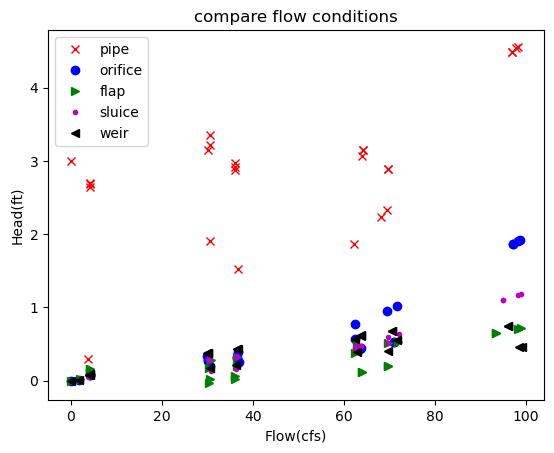

In [37]:
ax = None

for ctl, s in zip(controls, styles):
    df = results[ctl]
    df['flow'] = df['US flow (ft3/s)']
    df['head'] = df['US total head (ft AD)'] - df['DS total head (ft AD)']
    if ax is None:
        ax = df.plot(x='flow', y='head', label=ctl, style=s)
    else:
        df.plot(x='flow', y='head', label=ctl, ax=ax, style=s)

ax.set_title('compare flow conditions')
ax.set_ylabel('Head(ft)')
ax.set_xlabel('Flow(cfs)')

Text(0.5, 0, 'Flow(cfs)')

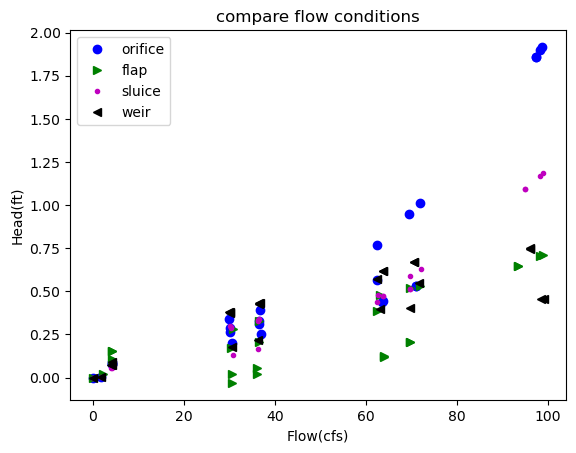

In [35]:

controls = controls[1:]
styles = styles[1:]

ax = None

for ctl, s in zip(controls, styles):
    df = results[ctl]
    df['flow'] = df['US flow (ft3/s)']
    df['head'] = df['US total head (ft AD)'] - df['DS total head (ft AD)']
    if ax is None:
        ax = df.plot(x='flow', y='head', label=ctl, style=s)
    else:
        df.plot(x='flow', y='head', label=ctl, ax=ax, style=s)

ax.set_title('compare flow conditions')
ax.set_ylabel('Head(ft)')
ax.set_xlabel('Flow(cfs)')